In [1]:
# import data
import pandas as pd

In [2]:
df=pd.read_csv("iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

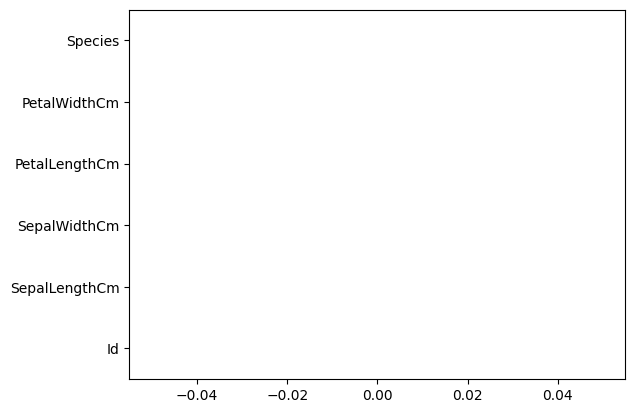

In [4]:
#Check null values
df.isnull().sum().plot(kind='barh')

In [5]:
#  Separate X and Y
X=df.drop(labels=['Id','Species'],axis=1)
Y=df[['Species']]

In [7]:
# Preprocessing
# X has only numeric feaures
# Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().set_output(transform='pandas')
X_pre=scaler.fit_transform(X)

In [8]:
import pickle
with open('scaler.pkl','wb') as file1: # wb is for write binary
    pickle.dump(scaler,file1)

In [9]:
# check a file is added in notebook as scaler.pkl
X_pre

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [10]:
# Train test data
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.33,random_state=21)

In [12]:
xtrain.shape

(100, 4)

In [13]:
xtest.shape

(50, 4)

In [14]:
ytest.value_counts()

Species        
Iris-setosa        18
Iris-versicolor    17
Iris-virginica     15
Name: count, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [16]:
model.fit(xtrain,ytrain)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
# Model Evaluation
model.score(xtrain,ytrain)

0.98

In [18]:
model.score(xtest,ytest)

0.94

In [19]:
# above model i a good model
with open('model.pkl','wb') as file2:
    pickle.dump(model,file2)

In [21]:
#To load any pickle file
with open('model.pkl','rb') as file4: # rb stands for read binary
    m=pickle.load(file4)

In [22]:
m

LogisticRegression()

In [ ]:
# to save/sync this file
